<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import os
import PIL

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
dataset_dir

'./datasets/flower_photos'

In [4]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)
dataset_dir

PosixPath('datasets/flower_photos')

In [5]:
list(dataset_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/19453165201_2aa747e0bf.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8249000137_eddfffa380_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054751430_5af76f6096_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15472217046_2699b25584.jpg')]

In [6]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(dataset_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg')]

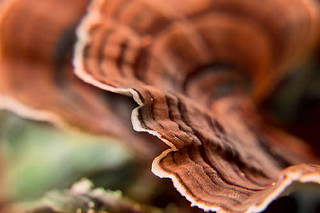

In [8]:
PIL.Image.open(str(roses[1]))

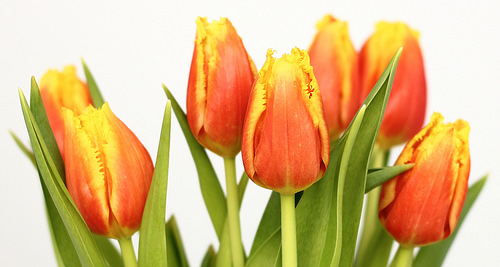

In [9]:
tulips = list(dataset_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flower_images_dict = {
    'roses' : list(dataset_dir.glob('roses/*')),
    'daisy' : list(dataset_dir.glob('daisy/*')),
    'dandelion' : list(dataset_dir.glob('dandelion/*')),
    'sunflowers' : list(dataset_dir.glob('sunflowers/*')),
    'tulips' : list(dataset_dir.glob('tulips/*'))
}

In [11]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [12]:
flower_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg')]

In [13]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/roses/4558025386_2c47314528.jpg'

In [14]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(334, 500, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
X,y = [],[]

for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [19]:
len(X_train)

2752

In [20]:
len(X_test)

918

In [21]:
X_train.shape

(2752, 180, 180, 3)

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
num_counts = 5

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_counts)

])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 20ms/step - loss: 1.4096 - accuracy: 0.4219
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 1.0279 - accuracy: 0.5912
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.8360 - accuracy: 0.6860
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5948 - accuracy: 0.7849
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.4147 - accuracy: 0.8528
Epoch 6/30
86/86 [==============================] - 2s 23ms/step - loss: 0.2250 - accuracy: 0.9222
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1814 - accuracy: 0.9448
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0824 - accuracy: 0.9789
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0407 - accuracy: 0.9891
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0594 - accuracy: 0.9847
Epoch 11/

In [24]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 22ms/step - loss: 3.4473 - accuracy: 0.6166


[3.4472928047180176, 0.6165577173233032]

In [25]:
predictions = model.predict(X_test)

29/29 [==============================] - 0s 10ms/step


In [27]:
score = tf.nn.softmax(predictions[0])

In [28]:
np.argmax(score)

3

In [29]:
y_test[0]

1

In [36]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

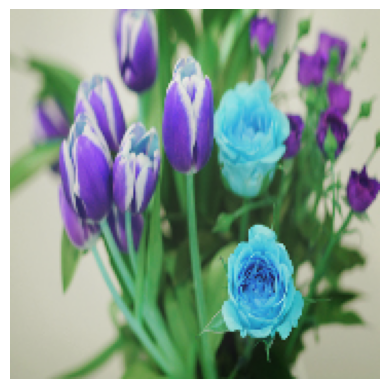

In [32]:
plt.axis('off')
plt.imshow(X[0])

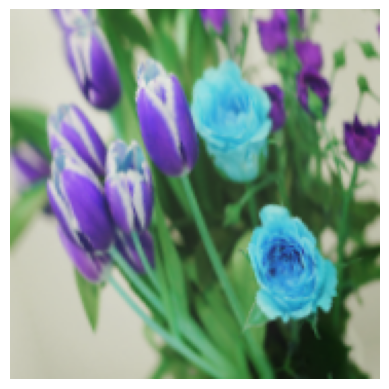

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [38]:
num_counts = 5

model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_counts)

])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 4s 27ms/step - loss: 1.2958 - accuracy: 0.4542
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0214 - accuracy: 0.6017
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.9289 - accuracy: 0.6384
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.8652 - accuracy: 0.6621
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.8012 - accuracy: 0.6890
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7504 - accuracy: 0.6991
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7251 - accuracy: 0.7209
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6918 - accuracy: 0.7384
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6643 - accuracy: 0.7435
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.6400 - accuracy: 0.7504
Epoch 11/

In [39]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 1.1865 - accuracy: 0.7124


[1.186539649963379, 0.7124183177947998]